In [6]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
from skimage import io
from skimage.measure import label, regionprops

In [2]:
ctrl_dir = Path('ctrl_mito')
ctrl_mito = np.array([io.imread(x) for x in sorted(list(ctrl_dir.glob('./*png')))])
kd_dir = Path('kd_mito')
kd_mito = np.array([io.imread(x) for x in sorted(list(kd_dir.glob('./*png')))])

In [3]:
labeld_ctrl = label(ctrl_mito)
labeled_kd = label(kd_mito)

In [5]:
cell_type = []
volumes = []
axis_minor_length = []
axis_major_length = []
solidity = []
for props in regionprops(labeled_ctrl):
    cell_type.append('ctrl')
    volumes.append(props.area)
    axis_minor_length.append(props.axis_minor_length)
    axis_major_length.append(props.axis_major_length)
    solidity.append(props.solidity)
for props in regionpropslabeld_kd):
    cell_type.append('kd')
    volumes.append(props.area)
    axis_minor_length.append(props.axis_minor_length)
    axis_major_length.append(props.axis_major_length)
    solidity.append(props.solidity)

In [22]:
df = pd.DataFrame({'cell_type': cell_type,
                   'volume' : volumes,
                   'axis_minor_length': axis_minor_length,
                   'axis_major_length': axis_major_length,
                   'solidity': solidity})
df.head()

,cell_type,volume,axis_minor_length,axis_major_length,solidity
0,ctrl,545648.0,77.127440,156.848253,0.918167
1,ctrl,457678.0,66.717930,139.627873,0.943927
2,ctrl,449917.0,63.434572,142.629946,0.936847
3,ctrl,295946.0,59.479903,122.917124,0.933071
4,ctrl,395491.0,65.371332,155.257444,0.894022


<Axes: xlabel='cell_type', ylabel='volume'>

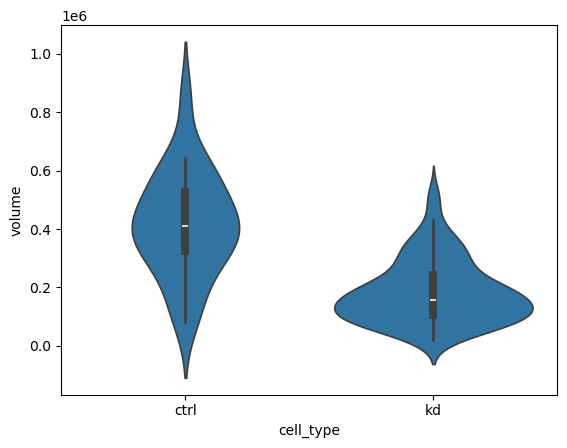

In [8]:
sns.violinplot(data=df, x='cell_type', y='volume')

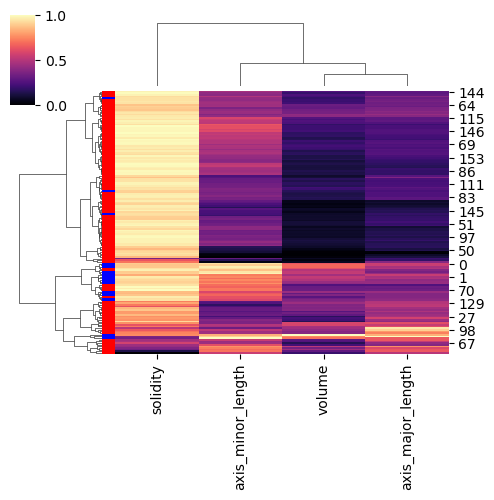

In [24]:
sns_plot = sns.clustermap(
    df[['volume', 'axis_minor_length', 'axis_major_length', 'solidity']], 
    method='ward', 
    metric='euclidean', 
    cmap='magma', 
    row_colors=['red' if x=='kd' else 'blue' for x in df['cell_type']],
    standard_scale=1
)